## Read dataset

In [23]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Define the path to the zip file and the name of the CSV file within the zip
zip_file_path = 'usa-real-estate-dataset.zip'
csv_file_name = 'realtor-data.zip.csv'  # Adjust if the file name inside the zip is different

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the zip archive (optional)
    print("Files in zip:", zip_ref.namelist())

    # Read the CSV file into a pandas DataFrame
    with zip_ref.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)
        print(df.head())  # Display the first few rows of the DataFrame

Files in zip: ['realtor-data.zip.csv']
   brokered_by    status     price  bed  bath  acre_lot     street  \
0    103378.00  for_sale 105000.00 3.00  2.00      0.12 1962661.00   
1     52707.00  for_sale  80000.00 4.00  2.00      0.08 1902874.00   
2    103379.00  for_sale  67000.00 2.00  1.00      0.15 1404990.00   
3     31239.00  for_sale 145000.00 4.00  2.00      0.10 1947675.00   
4     34632.00  for_sale  65000.00 6.00  2.00      0.05  331151.00   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico    601.00      920.00            NaN  
1    Adjuntas  Puerto Rico    601.00     1527.00            NaN  
2  Juana Diaz  Puerto Rico    795.00      748.00            NaN  
3       Ponce  Puerto Rico    731.00     1800.00            NaN  
4    Mayaguez  Puerto Rico    680.00         NaN            NaN  


## 3. Advantage and Disadvantage of Houses by Location.

In [25]:
# Filter the DataFrame to include only the columns of interest
df_3 = df[['bed', 'bath', 'house_size', 'price', 'city', 'state', 'zip_code']]

# Remove rows where house_size is greater than 100,000
df_3 = df_3[df_3['house_size'] <= 100000]

# Remove rows that contain N/A values in all columns except 'zip_code'
df_3 = df_3.dropna(subset=['bed', 'bath', 'house_size', 'price', 'city', 'state'])

# Convert the zip_code column to 5-digit strings
df_3['zip_code'] = df_3['zip_code'].apply(lambda x: f'{int(x):05}' if pd.notna(x) else 'N/A')

# Display the first few rows of the filtered DataFrame
print(df_3.head())

   bed  bath  house_size     price           city        state zip_code
0 3.00  2.00      920.00 105000.00       Adjuntas  Puerto Rico    00601
1 4.00  2.00     1527.00  80000.00       Adjuntas  Puerto Rico    00601
2 2.00  1.00      748.00  67000.00     Juana Diaz  Puerto Rico    00795
3 4.00  2.00     1800.00 145000.00          Ponce  Puerto Rico    00731
5 4.00  3.00     2520.00 179000.00  San Sebastian  Puerto Rico    00612


In [26]:
class Database:
    def __init__(self, df):
        self.df = df
        
    def overall_avg():
        # Calculate the overall average of price, bed, bath, and house_size
        df_3_overall_average_values = df_3[['price', 'house_size', 'bed', 'bath']].mean()
        return df_3_overall_average_values
    
    def palette_3():
            # Lighter color palette
        palette = [
            '#66b3ff',  # light blue
            '#a4c2f4',  # light periwinkle
            '#dae8fc',  # light sky blue
            '#f4b6c2',  # light pink
            '#f6d8ce',  # light peach
            '#ffcc99',  # light orange
            '#fff2cc',  # light yellow
            '#b6d7a8',  # light sage
            '#c3d69b',  # light olive
            '#99ff99',  # light green
            '#ff9999'   # light red
        ]
        return palette

Database.overall_avg()

price        580163.30
house_size     2019.58
bed               3.26
bath              2.50
dtype: float64

### By State

/var/folders/0k/fcngbyc563bbtcn2mbqxdd5m0000gn/T/ipykernel_79178/2897483291.py:37: UserWarning: The palette list has more values (11) than needed (5), which may not be intended.
  ax = sns.barplot(x='Percentage', y='Metric', hue='State', data=comparison_df_graph_melted, orient='h', palette=Database.palette_3())


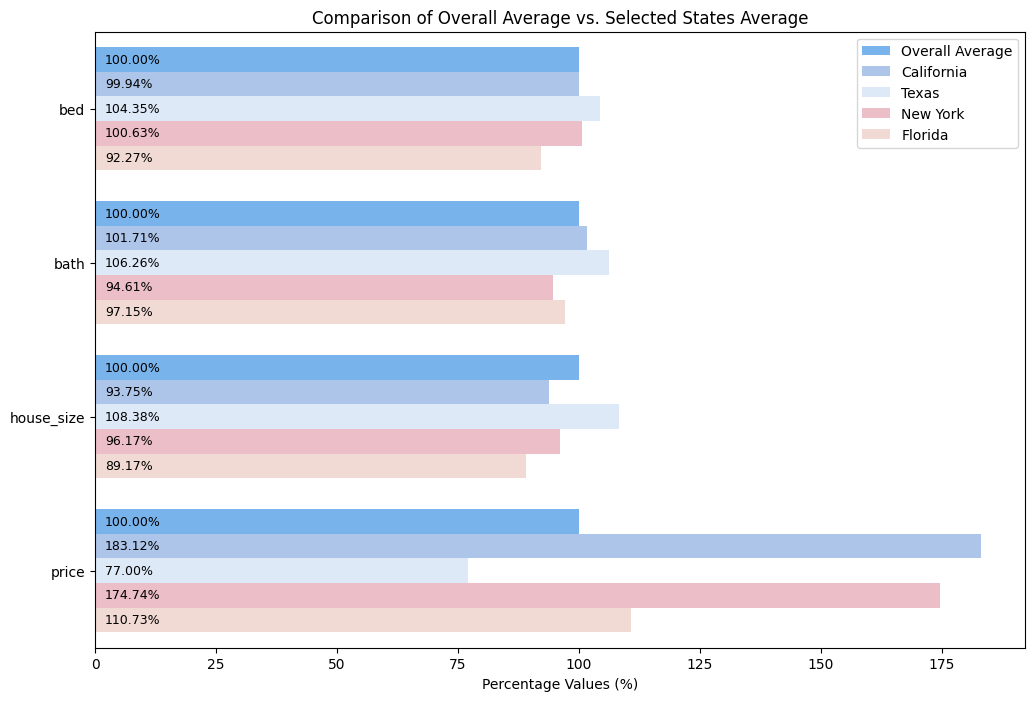

,Overall Average,California,Texas,New York,Florida
price,580163.30,1062421.40,446744.20,1013767.27,642407.90
house_size,2019.58,1893.34,2188.80,1942.18,1800.82
bed,3.26,3.26,3.40,3.28,3.01
bath,2.50,2.54,2.66,2.37,2.43


In [27]:
def overall_compare_by_states(*states):
    '''
    This function compares the average price, bed, bath, and house size of the selected states with the overall average.
    '''
    # Calculate the overall average values
    overall_avg_values = Database.overall_avg()

    # Create a DataFrame to hold the comparison values
    comparison_df_graph = pd.DataFrame({'Overall Average': 100}, index=['bed', 'bath', 'house_size', 'price'])

    # Create a DataFrame to hold the raw values
    comparison_df = pd.DataFrame({'Overall Average': overall_avg_values})

    for state in states:
        # Filter the DataFrame to include only rows for the current state
        df_filtered_state = df_3[df_3['state'] == state]
        
        # Calculate the average values for the current state
        state_avg_values = df_filtered_state[['bed', 'bath', 'house_size', 'price']].mean()
        
        # Normalize the values by dividing by the overall average and multiplying by 100 to get percentages
        state_avg_values_percentage = (state_avg_values / overall_avg_values) * 100
        
        # Add the state's average values to the comparison DataFrame
        comparison_df[state] = state_avg_values
        comparison_df_graph[state] = state_avg_values_percentage

    # Set display options to avoid scientific notation
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    # Melt the DataFrame for seaborn
    comparison_df_graph_melted = comparison_df_graph.reset_index().melt(id_vars='index', var_name='State', value_name='Percentage')
    comparison_df_graph_melted.rename(columns={'index': 'Metric'}, inplace=True)

    # Plot the comparison
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Percentage', y='Metric', hue='State', data=comparison_df_graph_melted, orient='h', palette=Database.palette_3())
    plt.title(f'Comparison of Overall Average vs. Selected States Average')
    plt.xlabel('Percentage Values (%)')
    plt.ylabel('')
    plt.legend(loc='upper right')

    # Annotate each bar with the respective value, skip zero values
    for p in ax.patches:
        width = p.get_width()
        if width != 0:  # Only annotate bars with non-zero values
            ax.text(2, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center', color='black', fontsize=9)

    plt.show()

    return comparison_df

# Example usage
overall_compare_by_states('California', 'Texas', 'New York', 'Florida')


### By City

/var/folders/0k/fcngbyc563bbtcn2mbqxdd5m0000gn/T/ipykernel_79178/1215780532.py:37: UserWarning: The palette list has more values (11) than needed (5), which may not be intended.
  ax = sns.barplot(x='Percentage', y='Metric', hue='city', data=comparison_df_graph_melted, orient='h', palette=Database.palette_3())


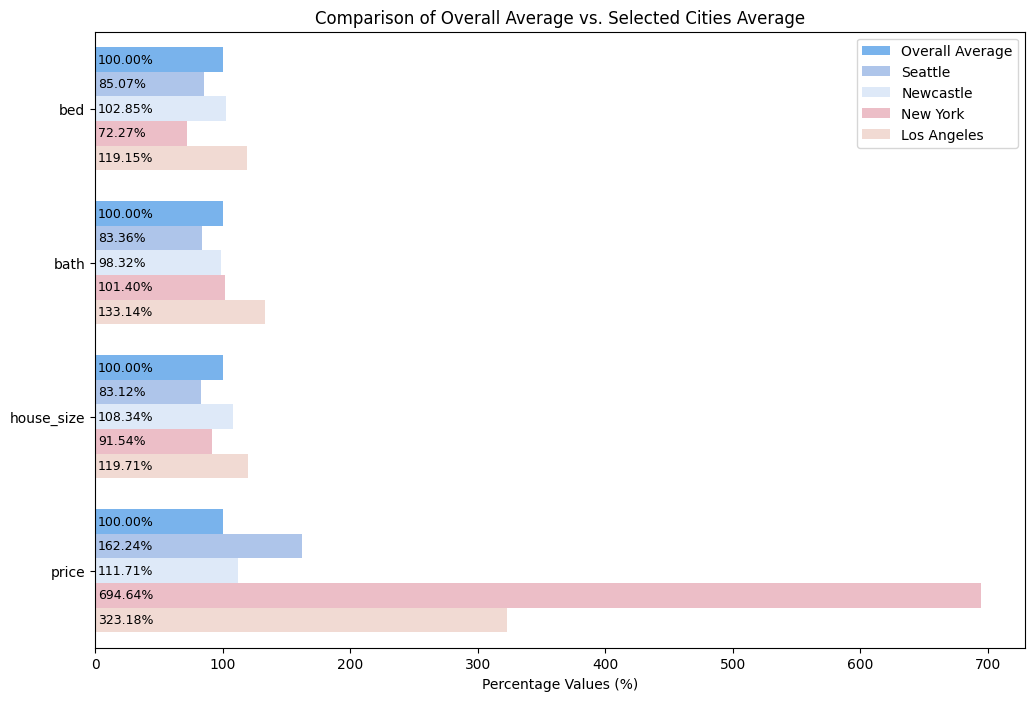

,Overall Average,Seattle,Newcastle,New York,Los Angeles
price,580163.30,941282.63,648119.58,4030041.70,1874951.41
house_size,2019.58,1678.70,2187.97,1848.75,2417.54
bed,3.26,2.77,3.35,2.36,3.88
bath,2.50,2.08,2.46,2.54,3.33


In [28]:
def overall_compare_by_Cities(*cities):
    '''
    This function compares the average price, bed, bath, and house size of the selected cities with the overall average.
    '''
    # Calculate the overall average values
    overall_avg_values = Database.overall_avg()

    # Create a DataFrame to hold the comparison values
    comparison_df_graph = pd.DataFrame({'Overall Average': 100}, index=['bed', 'bath', 'house_size', 'price'])

    # Create a DataFrame to hold the raw values
    comparison_df = pd.DataFrame({'Overall Average': overall_avg_values})

    for city in cities:
        # Filter the DataFrame to include only rows for the current city
        df_filtered_city = df_3[df_3['city'] == city]
        
        # Calculate the average values for the current city
        city_avg_values = df_filtered_city[['bed', 'bath', 'house_size', 'price']].mean()
        
        # Normalize the values by dividing by the overall average and multiplying by 100 to get percentages
        city_avg_values_percentage = (city_avg_values / overall_avg_values) * 100
        
        # Add the city's average values to the comparison DataFrame
        comparison_df[city] = city_avg_values
        comparison_df_graph[city] = city_avg_values_percentage

    # Set display options to avoid scientific notation
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    # Melt the DataFrame for seaborn
    comparison_df_graph_melted = comparison_df_graph.reset_index().melt(id_vars='index', var_name='city', value_name='Percentage')
    comparison_df_graph_melted.rename(columns={'index': 'Metric'}, inplace=True)

    # Plot the comparison
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Percentage', y='Metric', hue='city', data=comparison_df_graph_melted, orient='h', palette=Database.palette_3())
    plt.title(f'Comparison of Overall Average vs. Selected Cities Average')
    plt.xlabel('Percentage Values (%)')
    plt.ylabel('')
    plt.legend(loc='upper right')

    # Annotate each bar with the respective value, skip zero values
    for p in ax.patches:
        width = p.get_width()
        if width != 0:  # Only annotate bars with non-zero values
            ax.text(2, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center', color='black', fontsize=9)

    plt.show()

    return comparison_df

# Example usage
overall_compare_by_Cities('Seattle', 'Newcastle', 'New York', 'Los Angeles')


### Other Useful Tools

/var/folders/0k/fcngbyc563bbtcn2mbqxdd5m0000gn/T/ipykernel_79178/3187483222.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y=value, data=state_mean, palette="viridis")


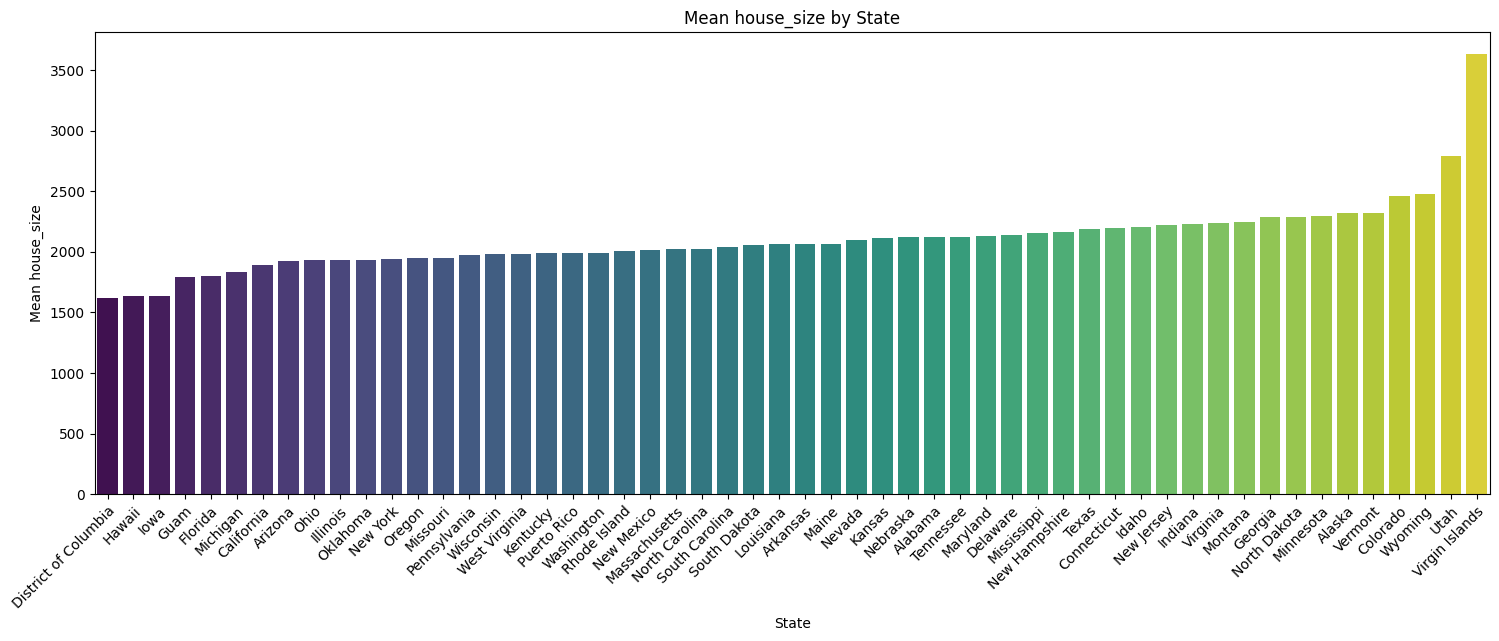

In [29]:
def plot_mean_by_state(value='price'):
    '''
    This function plots the mean price (by default) by state.
    You can specify a different value to plot, such as 'bed', 'bath', or 'house_size'.
    '''
    # Calculate mean price by state
    state_mean = df_3.groupby('state')[value].mean().reset_index()

    # Sort the results by price for better visualization (optional)
    state_mean = state_mean.sort_values(by=value)

    # Create the plot
    plt.figure(figsize=(18, 6))  # You can adjust the figure size as needed
    sns.barplot(x='state', y=value, data=state_mean, palette="viridis")
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Rotate the state labels for better readability
    plt.title('Mean' + ' ' + value + ' ' + 'by State')
    plt.xlabel('State')
    plt.ylabel('Mean' + ' ' + value)
    plt.show()

plot_mean_by_state('house_size')

In [34]:
def list_cities_by_state(state_name, sort_column='city', export=False):
    '''
    This function lists cities in a given state along with the mean values of bed, bath, house size, and price.
    The output is sorted based on the specified column.
    '''
    # Validate sort_column input
    if sort_column not in ['bed', 'bath', 'price', 'house_size', 'city', 'zip_code']:
        raise ValueError("Invalid sort column. Please choose among 'bed', 'bath', 'price', 'house_size', 'city', 'zip_code'.")

    # Filter the DataFrame for the selected state
    state_df = df_3[df_3['state'] == state_name]

    # Group by city and calculate mean for specified columns
    mean_values_df = state_df.groupby('city').agg({
        'bed': 'mean',
        'bath': 'mean',
        'house_size': 'mean',
        'price': 'mean'
    }).reset_index()

    # Since the aggregation will drop non-numeric columns, manually add state and zip code information
    # Get the first zip code and state for each city (as a simplification, assuming all entries in a city have the same state/zip)
    state_zip = state_df.groupby('city').agg({
        'state': 'first',
        'zip_code': 'first'
    }).reset_index()

    # Merge the mean values with the state and zip information
    merged_df = mean_values_df.merge(state_zip, on='city', how='left')

    # Sort the DataFrame by the specified column
    sorted_df = merged_df.sort_values(by=sort_column).reset_index(drop=True)

    # Export the DataFrame to a CSV file if the export parameter is True
    if export:
        file_name = f"{state_name} cities {sort_column}.csv"
        sorted_df.to_csv(file_name, index=False)
        print(f"Data exported to {file_name}")

    return sorted_df

# Example usage
list_cities_by_state('Arizona', sort_column='house_size')

,city,bed,bath,house_size,price,state,zip_code
0,Hackberry,1.00,1.00,712.00,165000.00,Arizona,86411
1,Whetstone,2.00,2.00,800.00,139900.00,Arizona,85616
2,Bullhead,2.00,1.00,850.00,119900.00,Arizona,86442
3,Ehrenberg,3.00,2.33,914.67,139600.00,Arizona,85334
4,Guadalupe,2.50,1.50,924.00,199950.00,Arizona,85283
...,...,...,...,...,...,...,...
210,Nutrioso,3.50,3.00,3653.00,685000.00,Arizona,85932
211,Blue,6.00,8.00,4000.00,3500000.00,Arizona,85922
212,Paradise Valley,4.45,5.35,5944.55,5302004.91,Arizona,85253
213,Colorado City,6.50,5.00,6830.00,537000.00,Arizona,86021
